# Evaluation and validation of machine learning algorithms

To optimize your machine learning results you will need to evaluate its performance on the data you want to analyze. In specific, this performance should be evaluated on data the algorithm has not seen before. Next to a data set that you use to train the algorithm, the **training set**, typically part of the data will be reserved to test algorithm performance. We call this part of the data the **test set**. In addition to the test set, we often need an additional split of the data: **a validation set**. The validation set is used when we need to optimize so-called hyperparameters. Hyperparameters are algorithm parameters that need to be set (and fixed) before we start the actual training process. In general, we first run a couple of training runs to optimize these hyperparameters, evaluate them on the validation set, and then start training with the best performing settings of these hyperparameters. Examples of hyperparameters are the learning rate, the optimizer used, and network structure with neural networks.

It is important to measure the performance of your algorithm on each of these data sets. When training it is important to evaluate your algorithm on the **training set** so you can improve your algorithm; the algorithm needs to learn on the basis of a performance metric. The evaluation on the **test set** is important to see how well the algorithm performs on unseen data and the evaluation on the **validation set** gives you an idea of the suitability of several sets of hyperparameters. In this lesson, we will consider several performance metrics that are used for classification algorithms. We will start however in creating a **training set**, **test set**, and **validation set**.

## Creating a training-, test-, and validation set

To illustrate the creation of a training-, test-, and validation set, we will first have to create a dataset. We use an sklearn function to create a classification with two classes. We can then train an algorithm on this classification. We can create the artificial data set using the following code:

In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False,
                            n_classes = 2)
X.shape, y.shape

((1000, 4), (1000,))

Creating a training and test set now is actually really easy using **sklearn**, as the following example illustrates. We need to pass both the **data** and the **target labels** to the **train_test_split** function, along with the percentage of the data that we want to use for the test data. As can be seen we will use 80% of the data for the training set, and 20% of the data for the test set.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 4), (200, 4), (800,), (200,))

Note also the notation for the variables returned from the train_test_split function. It is common to start the variable name for the data with **X** and to start the variable name for its labels with **y**. In addition, we often use a suffix to the variable name to indicate whether its training or test data. To create a validation set we can split off some data of either the training set or the test set. Below, we are splitting the validation off of the test set to result use 80% of the data set for the training set, 10% for the test set, and 10% for the validation set.

In [3]:
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size = 0.50)
X_test.shape, X_validation.shape, y_test.shape, y_validation.shape

((100, 4), (100, 4), (100,), (100,))

## Evaluating a classification algorithm

To evaluate a classification algorithm we will use several performance metrics who all are based off the confusion matrix of a classifier. In this section, we will first train a classifier on the training set and then explain the concept of a confusion matrix and the several metrics based on it.

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)

After training the classifier, we can see how well it performs on unseen data. For that, we first will need to predict the class labels for the test set. By comparing the predicted class labels with the ground-truth/actual labels in **Y_test** we can see how well the algorithm performs. By comparing the predicted with the actual labels we can create a table like the one below:

| Actual/Predicted | Predicted Negative  | Predicted Positive  |
| ---------------- | ------------------- | ------------------- |
| Actual Negative  | True Negatives (TN) | False Positives (FP)|
| Actual Positive  | False Negatives (FN)| True Positives (TP) |

This table is called the confusion matrix. In every cell, we compare the actual label with the predicted label. For the cases that were predicted negative, we check how many of them were actual negative (the true negatives) and how many should have been actually positive (the false negatives). Likewise, for the predictive positives, we check how many of them should be actually positive (the true positives) and how many should have actually been classified negative (the false positives). To create a confusion matrix for the classifier we trained above, we can execute the following code.

In [5]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[44,  3],
       [ 2, 51]])

On the basis of the confusion matrix we can calculate several performance metrics. We will cover the following
performance metrics below:
* Accuracy
* Precision
* Recall
* F1-score

There are many more metrics that can be based on the confusion matrix, see for example the table "Terminology and derivations from a confusion matrix" at https://en.wikipedia.org/wiki/Precision_and_recall. The metrics above are however the ones that you come across most often. That's why we limit our discussion here to these metrics.

The first metric, accuracy, can be defined as follows:


$accuracy = \dfrac{TP+TN}{TP+TN+FP+FN}$

Hence, the accuracy is the number of correctly made predictions divided by the total number of cases in the test set. The accuracy can be calculate by using the sklearn **accuracy_score** function.

In [6]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.95

However be careful to only look at accuracy! Especially, when there is a large class imbalance, it is really easy to reach high accuracy. In the example below, we have much more negatives than positives. The confusion matrix then looks like the one below.

In [7]:
import numpy as np

y_acc_true = np.concatenate([np.zeros(998), np.ones(2)])
y_acc_pred = np.concatenate([np.zeros(999), np.ones(1)])

confusion_matrix(y_acc_true, y_acc_pred)

array([[998,   0],
       [  1,   1]])

By predicting negative by default, the model can already reach almost 100% accuracy without learning anything:

In [8]:
accuracy_score(y_acc_true, y_acc_pred)

0.999

That's why it is important also to look at other metrics, like precision, recall, and F1. The precision can be defined as follows:

$precision = \dfrac{TP}{TP + FP}$

It divides the true positives by the number of cases that have been predicted positive by the model (TP + FP). Hence, it calculates the ratio of the predicted positives that are actually correct. In the case below, 95% of the predicted positives were in truth positive. The model has a high precision.

In [9]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.9444444444444444

The recall or true positive rate can be defined as follows:

$recall = \dfrac{TP}{TP+FN}$

It divides the true positives by the number of cases that are in truth positive (TP+FN) and that should actually have been labelled positive by the model. As such, the recall can be used to give us an idea of how many positives out of the total population of positives we were actually able to identify. In the case below, we were able to predict 91% of all positives correctly.

In [10]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.9622641509433962

The F1 is a based off the precision and recall and is defined as follows:

$F1 = 2 * \dfrac{precision * recall}{precision + recall}$

The F1 score is typically used if you seek to balance recall and precision. In addition, the F1 score is a suitable measure if you are dealing with an uneven class distribution. For instance, if the number of actual negatives is large.

In [11]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.9532710280373832

If we apply the F1-score on the data set with the large imbalance above, we see that it gives a much better idea of the algorithm performance than the accuracy above. While accuracy was 99.9%, we see the F1 score is only 66.6%, illustrating the imbalance in the data set.

In [12]:
f1_score(y_acc_true, y_acc_pred)

0.6666666666666666

Instead of using the separate functions above to calculate precision, recall and f1-score, we can use the handy **classification_report** function to calculate these performance metrics for each of the classification categories at once.

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.94      0.96      0.95        53

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



## ROC curve

In [14]:
y_pred_prob = clf.predict_proba(X_test)
y_pred_prob.shape

(100, 2)

In [15]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])

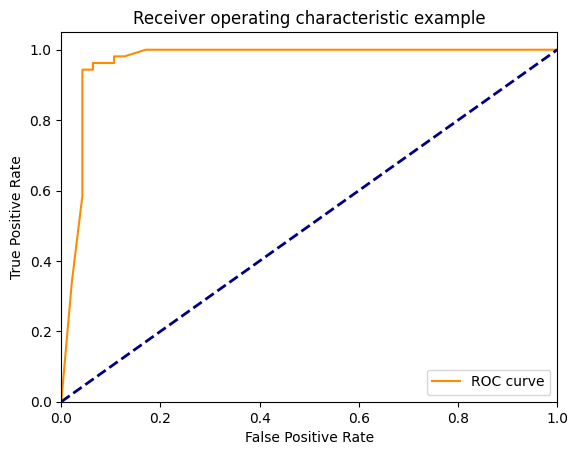

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

# Searching for the best hyperparameter combinations

Hyperparameters are parameters that are set before training the algorithm. In the previous parts of the course, we have seen already several examples of hyperparameters. It can for example be the number of trees for a Random Forest algorithm, the kernel type for a Support Vector Machine, or the learning rate, momentum, and learning rate decay for a Stochastic Gradient Descent when training a neural network. The combination of the hyperparameters can influence the performance of your machine learning algorithm greatly. Some hyperparameters may be more important than others and the importance of hyperparameters can even be dependent on the data set. In this section, we are going to discuss two methods that help you tune your hyperparameters automatically:

* Grid search
* Random search

Before describing both methods in more detail and showing the how to implement both types of searches in Python, the following picture illustrates the differences between the two methods intuitively:

![Visual Representation of Grid Search compared to Random Search](../images/grid_vs_random_search.png)

In general, it is advised to use random search for hyperparameter optimization as it usually delivers better or similar results faster. See for more information: http://www.jmlr.org/papers/v13/bergstra12a.html To show this we will search for the best hyperparameters for the RandomForestClassifier, defined in the beginning of this notebook, with both Grid Search and Random Search.


## Grid Search

In Grid Search, we try every combination of a preset list of values of the hyper-parameters and evaluate the model for each combination. The pattern followed here is similar to the grid, where all the values are placed in the form of a matrix. Each set of parameters is taken into consideration and the accuracy is noted. Once all the combinations are evaluated, the model with the set of parameters which give the top accuracy is considered to be the best.

![Visual Representation of Grid Search](../images/grid_search.png)

One of the major drawbacks of grid search is that when it comes to dimensionality, it suffers when the number of hyperparameters grows exponentially. With as few as four parameters this problem can become impractical, because the number of evaluations required for this strategy increases exponentially with each additional parameter, due to the curse of dimensionality.

In [17]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [18]:
%%timeit -r 1

from sklearn.model_selection import GridSearchCV

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.958 (std: 0.017)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.957 (std: 0.016)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_split': 10}

Model with rank: 3
Mean validation score: 0.956 (std: 0.024)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.956 (std: 0.014)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.955 (std: 0.026)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_split': 10}

Model with rank: 3
Mean validation score: 0.953 (std: 0.027)
Parameters: {'bootstrap': False, 'criteri

## Random Search

Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It tries random combinations of a range of values. To optimise with random search, the function is evaluated at some number of random configurations in the parameter space.

![Visual Representation of Random search](../images/random_search.png)

The chances of finding the optimal parameter are comparatively higher in random search because of the random search pattern where the model might end up being trained on the optimised parameters without any distortions (as with a grid based approach). Random search works best for lower dimensional data since the time taken to find the right set is less with less number of iterations. Random search is the best parameter search technique when there are less number of dimensions. In the paper Random Search for Hyper-Parameter Optimization by Bergstra and Bengio (http://www.jmlr.org/papers/v13/bergstra12a.html), the authors show empirically and theoretically that random search is more efficient for parameter optimization than grid search.

In [19]:
%%timeit -r 1

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 4),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=20, cv=5)

random_search.fit(X, y)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.951 (std: 0.025)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_split': 8}

Model with rank: 1
Mean validation score: 0.951 (std: 0.018)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_split': 10}

Model with rank: 3
Mean validation score: 0.950 (std: 0.014)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_split': 10}

Model with rank: 3
Mean validation score: 0.950 (std: 0.025)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_split': 10}

Model with rank: 1
Mean validation score: 0.953 (std: 0.021)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_split': 6}

Model with rank: 2
Mean validation score: 0.950 (std: 0.020)
Parameters: {'bootstrap': True, 'crit

As can be seen the Random Search finds similar performing hyperparameters a lot faster than Grid Search.